In [37]:
#installing the required packages for google colab
!pip install https://github.com/nithinmurali/pygsheets/archive/master.zip
!apt-get -qq install -y graphviz && pip install -q pydot
!pip install openpyxl

     | 112kB 2.7MB/s
  Running setup.py bdist_wheel for pygsheets ... - \ done
  Stored in directory: /tmp/pip-ephem-wheel-cache-so31q66x/wheels/d9/57/8e/549fffb1482b9d3ec4f60a378f4c32f3dbba74e4aad728dd27
Successfully built pygsheets


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pygsheets

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import plot_model
from keras.initializers import *
from sklearn.preprocessing import *
from sklearn.metrics import *

In [0]:
#Authorize 
!pip install -U -q PyDrive ## you will have install for every colab session
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
#loading the dataset from drive to colab
imp = drive.CreateFile({'id':'1Wcf0XRJa1R02lvlUhJl7vcvSN9TVWYW0'})
imp.GetContentFile('pima-indians-diabetes.csv')

In [42]:
#colab to pandas
df= pd.read_csv("pima-indians-diabetes.csv")
df.columns = np.arange(9) #rename labels
df

,0,1,2,3,4,5,6,7,8
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0
5,3,78,50,32,88,31.0,0.248,26,1
6,10,115,0,0,0,35.3,0.134,29,0
7,2,197,70,45,543,30.5,0.158,53,1
8,8,125,96,0,0,0.0,0.232,54,1
9,4,110,92,0,0,37.6,0.191,30,0


In [0]:
X = df.iloc[:,0:8] #independent variable
Y = df.iloc[:,8] #dependent variable

We inout the results from all the other analysis to get the best combo for the highest accuracy

In [57]:
#for reproductivity
from numpy.random import seed 
seed(7) 
from tensorflow import set_random_seed 
set_random_seed(2)
#feature scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)
model = Sequential()
model.add(Dense(1050, input_dim=8, kernel_initializer='RandomNormal', activation='tanh')) 
model.add(Dense(525, kernel_initializer='RandomNormal', activation='relu')) 
model.add(Dense(125, kernel_initializer='RandomNormal', activation='tanh'))
model.add(Dense(1, kernel_initializer='RandomNormal', activation='sigmoid')) 
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X, Y, epochs=150, batch_size=97,  validation_split=0.20 ) #verbose = 2,
scores = model.evaluate(X, Y)
print ("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

            

Train on 613 samples, validate on 154 samples
Epoch 1/150
613/613 [==============================] - 1s 1ms/step - loss: 0.5748 - acc: 0.7162 - val_loss: 0.4771 - val_acc: 0.7792
Epoch 2/150
613/613 [==============================] - 0s 158us/step - loss: 0.4613 - acc: 0.7863 - val_loss: 0.4894 - val_acc: 0.7597
Epoch 3/150
613/613 [==============================] - 0s 159us/step - loss: 0.4614 - acc: 0.7830 - val_loss: 0.4671 - val_acc: 0.7597
Epoch 4/150
613/613 [==============================] - 0s 179us/step - loss: 0.4452 - acc: 0.7945 - val_loss: 0.4826 - val_acc: 0.7662
Epoch 5/150
613/613 [==============================] - 0s 160us/step - loss: 0.4369 - acc: 0.7863 - val_loss: 0.4656 - val_acc: 0.7662
Epoch 6/150
613/613 [==============================] - 0s 166us/step - loss: 0.4303 - acc: 0.7928 - val_loss: 0.4619 - val_acc: 0.7532
Epoch 7/150
613/613 [==============================] - 0s 181us/step - loss: 0.4262 - acc: 0.7993 - val_loss: 0.4752 - val_acc: 0.7662
Epoch 8/150

613/613 [==============================] - 0s 231us/step - loss: 0.3652 - acc: 0.8336 - val_loss: 0.4965 - val_acc: 0.7922
Epoch 22/150
613/613 [==============================] - 0s 222us/step - loss: 0.3563 - acc: 0.8401 - val_loss: 0.4865 - val_acc: 0.8182
Epoch 23/150
613/613 [==============================] - 0s 241us/step - loss: 0.3445 - acc: 0.8532 - val_loss: 0.4892 - val_acc: 0.8117
Epoch 24/150
613/613 [==============================] - 0s 219us/step - loss: 0.3400 - acc: 0.8401 - val_loss: 0.5247 - val_acc: 0.7662
Epoch 25/150
613/613 [==============================] - 0s 225us/step - loss: 0.3539 - acc: 0.8369 - val_loss: 0.5086 - val_acc: 0.7987
Epoch 26/150
613/613 [==============================] - 0s 233us/step - loss: 0.3624 - acc: 0.8189 - val_loss: 0.5801 - val_acc: 0.7532
Epoch 27/150
613/613 [==============================] - 0s 214us/step - loss: 0.3474 - acc: 0.8369 - val_loss: 0.4913 - val_acc: 0.8117
Epoch 28/150
613/613 [==============================] - 0s 23

613/613 [==============================] - 0s 247us/step - loss: 0.2115 - acc: 0.9217 - val_loss: 0.5932 - val_acc: 0.7922
Epoch 43/150
613/613 [==============================] - 0s 221us/step - loss: 0.2029 - acc: 0.9347 - val_loss: 0.5747 - val_acc: 0.7922
Epoch 44/150
613/613 [==============================] - 0s 234us/step - loss: 0.2110 - acc: 0.9119 - val_loss: 0.6032 - val_acc: 0.7857
Epoch 45/150
613/613 [==============================] - 0s 244us/step - loss: 0.1937 - acc: 0.9347 - val_loss: 0.6207 - val_acc: 0.7857
Epoch 46/150
613/613 [==============================] - 0s 218us/step - loss: 0.1968 - acc: 0.9217 - val_loss: 0.5956 - val_acc: 0.7792
Epoch 47/150
613/613 [==============================] - 0s 235us/step - loss: 0.1916 - acc: 0.9299 - val_loss: 0.6417 - val_acc: 0.7857
Epoch 48/150
613/613 [==============================] - 0s 217us/step - loss: 0.1816 - acc: 0.9282 - val_loss: 0.6342 - val_acc: 0.7857
Epoch 49/150
613/613 [==============================] - 0s 23

613/613 [==============================] - 0s 231us/step - loss: 0.1005 - acc: 0.9804 - val_loss: 0.8022 - val_acc: 0.7922
Epoch 63/150
613/613 [==============================] - 0s 222us/step - loss: 0.1153 - acc: 0.9527 - val_loss: 0.8462 - val_acc: 0.7403
Epoch 64/150
613/613 [==============================] - 0s 226us/step - loss: 0.1328 - acc: 0.9527 - val_loss: 0.7759 - val_acc: 0.7987
Epoch 65/150
613/613 [==============================] - 0s 238us/step - loss: 0.1292 - acc: 0.9396 - val_loss: 0.8221 - val_acc: 0.7597
Epoch 66/150
613/613 [==============================] - 0s 221us/step - loss: 0.1041 - acc: 0.9772 - val_loss: 0.8104 - val_acc: 0.7792
Epoch 67/150
613/613 [==============================] - 0s 253us/step - loss: 0.1127 - acc: 0.9657 - val_loss: 0.7610 - val_acc: 0.7987
Epoch 68/150
613/613 [==============================] - 0s 228us/step - loss: 0.0927 - acc: 0.9788 - val_loss: 0.8093 - val_acc: 0.7662
Epoch 69/150
613/613 [==============================] - 0s 23

613/613 [==============================] - 0s 238us/step - loss: 0.0322 - acc: 0.9951 - val_loss: 0.9316 - val_acc: 0.7662
Epoch 83/150
613/613 [==============================] - 0s 244us/step - loss: 0.0295 - acc: 0.9984 - val_loss: 0.9165 - val_acc: 0.7792
Epoch 84/150
613/613 [==============================] - 0s 223us/step - loss: 0.0316 - acc: 0.9951 - val_loss: 0.9321 - val_acc: 0.7662
Epoch 85/150
613/613 [==============================] - 0s 245us/step - loss: 0.0269 - acc: 0.9984 - val_loss: 0.9560 - val_acc: 0.7662
Epoch 86/150
613/613 [==============================] - 0s 226us/step - loss: 0.0257 - acc: 0.9984 - val_loss: 0.9371 - val_acc: 0.7792
Epoch 87/150
613/613 [==============================] - 0s 256us/step - loss: 0.0240 - acc: 0.9984 - val_loss: 0.9540 - val_acc: 0.7727
Epoch 88/150
613/613 [==============================] - 0s 256us/step - loss: 0.0227 - acc: 0.9984 - val_loss: 0.9530 - val_acc: 0.7532
Epoch 89/150
613/613 [==============================] - 0s 27

Epoch 103/150
613/613 [==============================] - 0s 240us/step - loss: 0.0136 - acc: 1.0000 - val_loss: 1.0408 - val_acc: 0.7662
Epoch 104/150
613/613 [==============================] - 0s 260us/step - loss: 0.0131 - acc: 1.0000 - val_loss: 1.0390 - val_acc: 0.7468
Epoch 105/150
613/613 [==============================] - 0s 233us/step - loss: 0.0128 - acc: 1.0000 - val_loss: 1.0503 - val_acc: 0.7532
Epoch 106/150
613/613 [==============================] - 0s 245us/step - loss: 0.0122 - acc: 1.0000 - val_loss: 1.0554 - val_acc: 0.7662
Epoch 107/150
613/613 [==============================] - 0s 251us/step - loss: 0.0115 - acc: 1.0000 - val_loss: 1.0612 - val_acc: 0.7532
Epoch 108/150
613/613 [==============================] - 0s 258us/step - loss: 0.0116 - acc: 1.0000 - val_loss: 1.0704 - val_acc: 0.7597
Epoch 109/150
613/613 [==============================] - 0s 232us/step - loss: 0.0111 - acc: 1.0000 - val_loss: 1.0739 - val_acc: 0.7662
Epoch 110/150
613/613 [==================

Epoch 124/150
613/613 [==============================] - 0s 248us/step - loss: 0.0072 - acc: 1.0000 - val_loss: 1.1258 - val_acc: 0.7597
Epoch 125/150
613/613 [==============================] - 0s 235us/step - loss: 0.0069 - acc: 1.0000 - val_loss: 1.1416 - val_acc: 0.7662
Epoch 126/150
613/613 [==============================] - 0s 264us/step - loss: 0.0067 - acc: 1.0000 - val_loss: 1.1452 - val_acc: 0.7597
Epoch 127/150
613/613 [==============================] - 0s 249us/step - loss: 0.0065 - acc: 1.0000 - val_loss: 1.1560 - val_acc: 0.7597
Epoch 128/150
613/613 [==============================] - 0s 240us/step - loss: 0.0064 - acc: 1.0000 - val_loss: 1.1540 - val_acc: 0.7597
Epoch 129/150
613/613 [==============================] - 0s 235us/step - loss: 0.0064 - acc: 1.0000 - val_loss: 1.1398 - val_acc: 0.7597
Epoch 130/150
613/613 [==============================] - 0s 220us/step - loss: 0.0063 - acc: 1.0000 - val_loss: 1.1557 - val_acc: 0.7532
Epoch 131/150
613/613 [==================

613/613 [==============================] - 0s 243us/step - loss: 0.0045 - acc: 1.0000 - val_loss: 1.1927 - val_acc: 0.7597
Epoch 145/150
613/613 [==============================] - 0s 276us/step - loss: 0.0044 - acc: 1.0000 - val_loss: 1.2016 - val_acc: 0.7532
Epoch 146/150
613/613 [==============================] - 0s 254us/step - loss: 0.0043 - acc: 1.0000 - val_loss: 1.2034 - val_acc: 0.7532
Epoch 147/150
613/613 [==============================] - 0s 257us/step - loss: 0.0043 - acc: 1.0000 - val_loss: 1.2033 - val_acc: 0.7597
Epoch 148/150
613/613 [==============================] - 0s 249us/step - loss: 0.0043 - acc: 1.0000 - val_loss: 1.2138 - val_acc: 0.7597
Epoch 149/150
613/613 [==============================] - 0s 235us/step - loss: 0.0041 - acc: 1.0000 - val_loss: 1.2142 - val_acc: 0.7597
Epoch 150/150
767/767 [==============================] - 0s 86us/step

acc: 95.05%


Now we have got 95% accuracy.


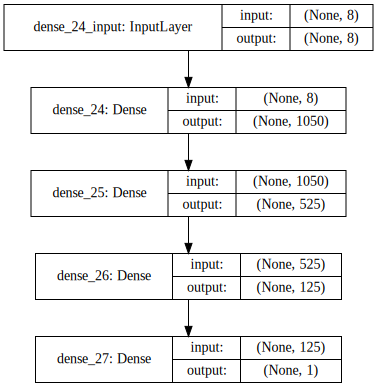

In [51]:
#Visualize  neural network
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
SVG(model_to_dot(model,show_shapes=True, ).create(prog='dot', format='svg'))

Now  lets see the accuracy change with increase in epochs and batch size


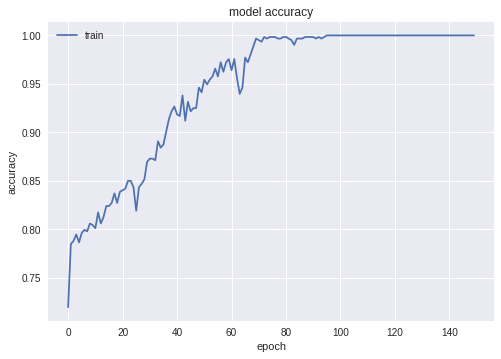

In [54]:
# epoch number vs accuracy 
plt.plot(history.history['acc'])
#plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

So epoch saturates after 80.


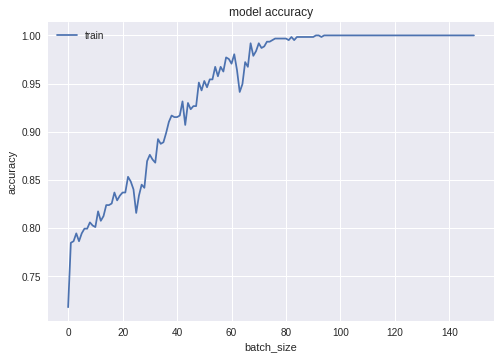

In [46]:
#batch size vs accuracy
plt.plot(history.history['acc'])
#plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('batch_size')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Batch size accuracy saturates after 80


In [47]:
# calculate predictions
predictions = model.predict(X)    # predicting Y only using X
# Round predictions
rounded = [int(np.round(x, 0)) for x in predictions]
print(rounded)


[0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 

In [0]:
#defing the ROC curve
def ROCcurve(fpr, tpr):
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    return (plt.show())

In [0]:
#defining a function for adjusted r square
def adjustedR(Ytest,ypredict,n,p):
    r2 = r2_score(Ytest,ypredict)
    adjustedr2 = 1-((1-r2)*((n-1)/(n-p-1)))
    #where n is number of observations in sample and p is number of independent variables in model
    return adjustedr2

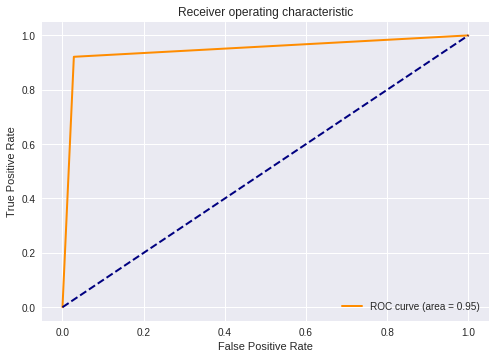

None

acc: 94.92%
F1score is: 0.93
diff of adj R and is: 0.002
The confusion matris is:
Predicted    0    1  All
Actual                  
0          486   14  500
1           21  246  267
All        507  260  767


In [55]:
#model analysis
fpr, tpr, thresholds = roc_curve(Y,rounded, pos_label=1)
print(ROCcurve(fpr, tpr))
r2 = abs(r2_score(Y,rounded))
adjustedr = abs(adjustedR(Y,rounded,len(df),len(df.columns)))
# Turn rounded from a 'list' class into a numpy array
newRounded = np.array(rounded)
df_confusion = pd.crosstab(Y, newRounded, rownames=['Actual'], colnames=['Predicted'], margins=True)
print ("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print("F1score is: %0.2f" % f1_score(Y,rounded))
print("diff of adj R and is: %0.3f" %abs(adjustedr-r2))
print ("The confusion matris is:")
print(df_confusion)

The accuracy is pretty good.The F1 score is close to 1 and the small difference between adj r and  r shows that the model is not overfitting. Also it has very large AUC.

So we can conclude that this NN model is good for predicting diabetes. 